# Power generation in India
 In this notebook, we will explore India's power generation over three years.
 
 India is the world's third largest producer and third largest consumer of electricity. The national electric grid in India has an installed capacity of 370.106 GW as of 31 March 2020. Renewable power plants, which also include large hydroelectric plants, constitute 35.86% of India's total installed capacity. During the 2018-19 fiscal year, the gross electricity generated by utilities in India was 1,372 TWh and the total electricity generation (utilities and non utilities) in the country was 1,547 TWh. 

Check the tableau link, of power generation india. and I have also did analytical work and forecasted the generation
[https://public.tableau.com/profile/arul.rajan.v#!/vizhome/power_india/PowergenerarioninIndia](http://)

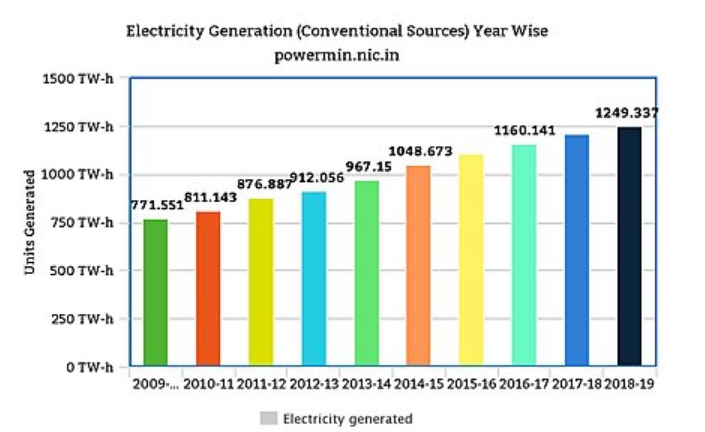

The unit MU stands for Mega Unit i.e one million unit of electricity where one unit signifies one kilowatt hour.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
power = pd.read_csv('/kaggle/input/daily-power-generation-in-india-20172020/file.csv')
power.head()

In [ ]:
state = pd.read_csv('/kaggle/input/daily-power-generation-in-india-20172020/State_Region_corrected.csv')
state.head()

In [ ]:
power.columns=["date","region","thermal_gen_act","thermal_gen_est","nuc_gen_act","nuc_gen_est","hydro_gen_act","hydro_gen_est"]

In [ ]:
power["thermal_gen_act"]=power["thermal_gen_act"].apply(lambda x:str(x).replace(',','')if ',' in str(x) else str(x))
power["thermal_gen_act"]=power["thermal_gen_act"].apply(lambda x: float(x))

In [ ]:
power["thermal_gen_est"]=power["thermal_gen_est"].apply(lambda x:str(x).replace(",","")if ',' in str(x) else str(x))
power["thermal_gen_est"]=power["thermal_gen_est"].apply(lambda x: float(x))

In [ ]:
power.tail()

## Trying to automate the analytics flow

* This will show the shape of dataframe.
* info of data 
* it describe the stats of data
* plots catogorical and numerical data
* the unique values and missing value percentage
* heatmap of missing values

In [ ]:
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

def automate_analysis(data):
    print("\n")
    print("The Dataset has {} rows & {} columns \n".format(data.shape[0],data.shape[1]))
    print("\n**********************************************************\n")
    print(data.info())
    print("\n**********************************************************\n")
    print(data.describe())
    print("\n**********************************************************\n")


    print("The following are the plots for categorical columns: \n")
    for i in data.columns:
        if data[i].dtypes == object:
            df = pd.DataFrame(data[i].value_counts().sort_values(ascending=False).head(20))
            plot1= df.plot(kind='bar',)
            plt.xlabel(i,fontsize=15)
            plt.ylabel('Frequency',fontsize=15)
            plt.yscale('log')
            plt.xticks(fontsize=12)
            plt.show(plot1)	
            print("\n {} has {} unique values and {} percentage of null values \n".
                   format(i,data[i].nunique(),round((data[i].isna().sum()/data.shape[0])*100,3)))
 
    print("The following are the plots for numeric columns: \n")
    for i in data.columns:
        if data[i].dtypes != object:
            plt.figure(figsize=(12,9))
            plot2= sns.distplot(data[i], bins = 25, kde = False)
            plt.xlabel(i,fontsize=15)
            plt.ylabel('Frequency',fontsize=15)
            plt.yscale('log')
            plt.xticks(fontsize=12)
            plt.show(plot2)
            print("\n {} has {} unique values and {} percentage of null values \n".
                  format(i,data[i].nunique(),round((data[i].isna().sum()/data.shape[0])*100,3)))	

    print("The following is the heatmap to show the NA values in columns")
    plt.figure(figsize=(12,9))
    plot3 = sns.heatmap(data.isnull(), cbar=False)
    plt.show(plot3)

In [ ]:
automate_analysis(power)

In [ ]:
automate_analysis(state)

In [ ]:
# correlation in the data

sns.heatmap(power.corr())

Nuclear Generation is not done by many of the states and hence it can assumed that values which are missing are actually 0.

And since the values are NaN in both the nuclear variables, both of the values can be replaced by 0.0

In [ ]:
#filling the missing values

power = power.fillna(0.0)

### Actual vs predicted

In [ ]:
def actualVpredicted(df,f1,f2,title):
    fig = go.Figure()
    fig.add_trace(go.Bar(
        x=df.region,
        y=df.groupby(['region'])[f1].sum(),
        name='Actual',
        marker_color='indianred'
    ))
    fig.add_trace(go.Bar(
        x=df.region,
        y=df.groupby(['region'])[f2].sum(),
        name='Predicted',
        marker_color='lightsalmon'
    ))

    fig.update_layout(barmode='group', title = title)
    fig.show()

In [ ]:
actualVpredicted(power,"thermal_gen_act","thermal_gen_est","Thermal Generation ")

In [ ]:
actualVpredicted(power,"nuc_gen_act","nuc_gen_est","Nuclear power Generation region wise ")

In [ ]:
actualVpredicted(power,"hydro_gen_act","hydro_gen_est","Hydro power Generation region wise ")

In [ ]:
#Total power genration region wise
power.groupby(by=['region'],as_index=False).sum()

In [ ]:
data = [power['thermal_gen_est'].sum(),power['nuc_gen_est'].sum(),power['hydro_gen_est'].sum()]
my_labels = 'THERMAL','NUCLEAR','HYDRO'
plt.pie(data, labels=my_labels, autopct='%1.1f%%', startangle=15)
plt.title('Power generation from sources')
plt.axis('equal')
plt.show()

## Thermal power generation region wise
### Comparison between actual production and estimation

In [ ]:
plt.rcParams['figure.figsize'] = 8, 5
plt.style.use("fivethirtyeight")
pd.options.plotting.backend = "plotly"



In [ ]:
def powergen(data,reg,title):
    df = data[data['region']== reg]
    fig = df.plot(x='date',y=['thermal_gen_act', 'thermal_gen_est'])
    fig.update_layout(title= title,legend_orientation="h")
    fig.show()

In [ ]:
powergen(power,"Southern","Thermal Generation in Southern Region")

In [ ]:
powergen(power,"Northern","Thermal Generation in Northern Region")

In [ ]:
powergen(power,"Western","Thermal Generation in Western Region")

In [ ]:
powergen(power,"Eastern","Thermal Generation in Eastern Region")

In [ ]:
share = state.groupby('Region').agg('sum')
share = share.reset_index()
share

In [ ]:
fig=px.bar(state,
           x='State / Union territory (UT)',
           y='Area (km2)',
           hover_data=['Area (km2)'],
           color='State / Union territory (UT)',
           )
fig.update_layout(title_text='Statewise Area(km2)')
fig.show()

In [ ]:
fig=px.bar(state,
           x='State / Union territory (UT)',
           y='National Share (%)',
           hover_data=['National Share (%)'],
           color='State / Union territory (UT)',
           )
fig.update_layout(title_text='Statewise Generation Share (%)')
fig.show()

## Forcast the power generation using facebook prophet

In [ ]:
from fbprophet import Prophet
power_prophet = power[['date','thermal_gen_act']]

In [ ]:
power_prophet = power_prophet.rename(columns = {'date': 'ds', 'thermal_gen_act' : 'y'})

In [ ]:
m = Prophet()
m.fit(power_prophet)

In [ ]:
# Forcasting into the future
future = m.make_future_dataframe(periods = 365)
forecast = m.predict(future)

In [ ]:
forecast

In [ ]:
figure = m.plot(forecast, xlabel = 'Date', ylabel = 'Thermal_generation')

In [ ]:
figure2 = m.plot_components(forecast)

### Forecast comparison with facebook prophet vs tableau forecast

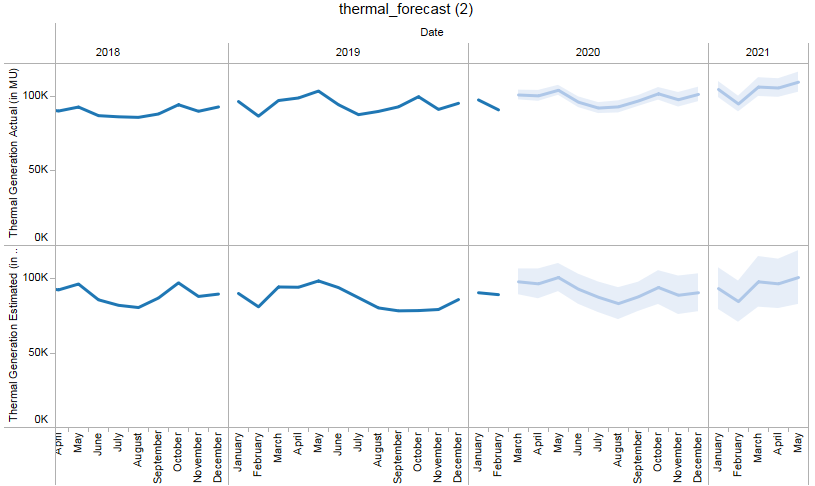


India's electricity sector consumes about 72% of the coal produced in the country. For utility power generation, India consumed 622.22 million tons of coal during 2019-20 which is less by 1% compared to 628.94 million tons during 2018-19. However coal imports for utility power generation increased by 12.3% during year 2019-20 at 69.22 million tons from 61.66 million tons during 2018-19

Thermal power production consists of coal, lignite, gas and diesel.
 
**From our analysis, India generates 85.7% of power using thermal which plays a major role in pollution. 
Nuclear generate 2.3%, this also impact enviornment in major level.
From hydro 11% are generated**

There are four types of environment impacts based on the nature and features of the impacts:

•  Direct impact- e.g. Impact of untreated wastewater from the power plant discharged into a river or stream impacting marine life.

•  Indirect impact - e.g. SO2 from power plant deposited as SO4 on the soil affects farming.

• Cumulative impact - e.g. Combined impact of all emissions of existing and upcoming projects in a region

• Induced impact - e.g. Impact of change in land use patterns and population in the area because of the plant on the existing natural resources like water, air.

Environmental Impact

1. Air Pollution
2. Water Pollution
3. Land Degradation
4. Noise pollution

***India ia country of large population, the power consumption in the upcoming years are also going to high in power consumption.
The country should take action to generate power using renewable sources.
***

Source:
* [https://www.thermalwatch.org.in/environmental-impact-assessment/impacts-power-plants](http://)
* [https://www.ripublication.com/ijeem_spl/ijeemv4n6_09.pdf](http://)
* [https://public.tableau.com/profile/arul.rajan.v#!/vizhome/power_india/PowergenerarioninIndia](http://)
